In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.linear_model import LogisticRegression

import seaborn as sn
from sklearn.ensemble import RandomForestRegressor
import nltk
from sklearn.metrics import roc_auc_score, f1_score
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [5]:
df = pd.read_csv('../data/merged/merged_cleaned_sentiment_train.csv')
df_validation = pd.read_csv('../data/merged/merged_cleaned_sentiment_validation.csv')
df_test = pd.read_csv('../data/merged/merged_cleaned_sentiment_test.csv')

In [6]:
df.head()

,Unnamed: 0,artist,trackname,danceability,energy,key,loudness,mode,speechiness,acousticness,...,id,time_signature,lyrics,lyrics_cleaned,y_valence,y_arousal,neg,neu,pos,compound
0,0,Dark Tranquillity,Insanity's Crescendo,0.320,0.798,6,-9.660,0,0.0584,0.00152,...,3SS3dDG9lKQxvfcJ7O4oTN,3,"Gently, hold our heads\mGently, hold our heads...","Gently, hold our heads Gently, hold our heads ...",-0.682725,0.316758,0.174,0.684,0.142,-0.9059
1,1,Duke Ellington,Caravan,0.434,0.600,5,-10.784,0,0.0286,0.86700,...,3Jw4lBWbcznhlitliEMW0x,4,Night and stars above that shine so bright\mTh...,Night and stars above that shine so bright The...,0.373325,-0.923151,0.000,0.724,0.276,0.9909
2,2,Ella Fitzgerald,Lullaby Of Birdland,0.530,0.270,5,-11.251,0,0.0365,0.91000,...,3RtJAYS51S5W6EMxrm9aMb,4,"Oh, lullaby by birdland that's what I\mAlways ...","Oh, lullaby by birdland that's what I Always h...",1.071901,0.846830,0.095,0.746,0.159,0.9456
3,3,cLOUDDEAD,Pop Song,0.479,0.528,9,-10.104,0,0.1040,0.58000,...,3ayXOJdCoW6noN3nJLXCxz,4,"[Intro]\mTwo, three\mI can't do it without-\mG...","Two, three I can't do it without- Go! (It’s)...",-1.056572,0.736206,0.037,0.864,0.099,0.9840
4,4,Boney M,Rasputin,0.639,0.893,9,-6.509,1,0.0360,0.28900,...,5jkFvD4UJrmdoezzT1FRoP,4,[Verse 1]\mThere lived a certain man in Russia...,There lived a certain man in Russia long ago...,1.541257,1.704165,0.106,0.663,0.231,0.9980


<AxesSubplot:>

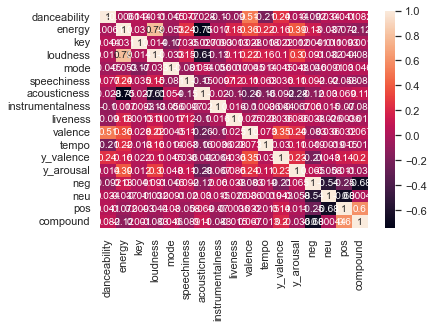

In [7]:
corrMatrix = df[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','y_valence', 'y_arousal', 'neg','neu','pos','compound']].corr()
sn.set(rc={'figure.figsize':(13,13)})

sn.heatmap(corrMatrix, annot=True)

# print(corrMatrix)

In [8]:
def do_regression(x_cols, include_test = False):
    '''x_cols is list of variables'''
#     train set
    X = df[x_cols].values
    y_valence = df.y_valence.values 
    y_arousal = df.y_arousal.values
#     validation set
    X_vali = df_validation[x_cols].values
    y_vali_valence = df_validation.y_valence.values 
    y_vali_arousal = df_validation.y_arousal.values 

    regr_val = LinearRegression()
    regr_arou = LinearRegression()
    
#     train model
    regr_val.fit(X, y_valence)
    regr_arou.fit(X, y_arousal)

#     score model
#     of train data
    r2_train_valence = regr_val.score(X, y_valence)
    r2_train_arousal = regr_arou.score(X, y_arousal)
#     of validation data
    r2_validation_valence = regr_val.score(X_vali, y_vali_valence)
    r2_validation_arousal = regr_arou.score(X_vali, y_vali_arousal)
    
    if include_test:
        X_test = df_test[x_cols].values
        y_test_valence = df_test.y_valence.values 
        y_test_arousal = df_test.y_arousal.values
            
        r2_test_valence = regr_val.score(X_test, y_test_valence)
        r2_test_arousal = regr_arou.score(X_test, y_test_arousal)
        print(f'''{r2_train_valence = }, {r2_train_arousal = }, {r2_validation_valence = }, {r2_validation_arousal = }
        {r2_test_valence = }, {r2_test_arousal = }''' )
        
    else:
        print(f'{r2_train_valence = }, {r2_train_arousal = }, {r2_validation_valence = }, {r2_validation_arousal = }' )  
        
#     print(f'{r2_train_valence = }, {r2_train_arousal = }, {r2_validation_valence = }, {r2_validation_arousal = }' )
#     print(f'{regr_val.coef_ = }, {regr_arou.coef_ = }')

# make dummies

In [9]:
df = pd.concat([df, pd.get_dummies(df.key, drop_first = True, prefix = 'key')], axis=1)
df_validation = pd.concat([df_validation, pd.get_dummies(df_validation.key, drop_first = True, prefix = 'key')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.key, drop_first = True, prefix = 'key')], axis=1)


In [10]:
df.columns

Index(['Unnamed: 0', 'artist', 'trackname', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'time_signature', 'lyrics',
       'lyrics_cleaned', 'y_valence', 'y_arousal', 'neg', 'neu', 'pos',
       'compound', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11'],
      dtype='object')

In [11]:
df.columns

Index(['Unnamed: 0', 'artist', 'trackname', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'time_signature', 'lyrics',
       'lyrics_cleaned', 'y_valence', 'y_arousal', 'neg', 'neu', 'pos',
       'compound', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11'],
      dtype='object')

# Baseline

In [12]:
x_cols = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','mode', 'key_1',            'key_2',
                  'key_3',            'key_4',            'key_5',
                  'key_6',            'key_7',            'key_8',
                  'key_9',           'key_10',           'key_11']
do_regression(x_cols)

r2_train_valence = 0.140505052645856, r2_train_arousal = 0.17616321217940423, r2_validation_valence = 0.13050775895109257, r2_validation_arousal = 0.19808858437288512


In [13]:
# with fewer variables

In [14]:
x_cols = ['danceability', 'energy', 'instrumentalness', 'valence','mode']
do_regression(x_cols)

r2_train_valence = 0.13518342395111127, r2_train_arousal = 0.17307121954094895, r2_validation_valence = 0.1317327087982939, r2_validation_arousal = 0.20085606950264345


# with statsmodels

In [15]:
def do_regression_sm(x_cols):
    '''x_cols is list of variables'''
#     train set
    X = df[x_cols].values
    y_valence = df.y_valence.values 
    y_arousal = df.y_arousal.values
#     validation set
    X_vali = df_validation[x_cols].values
    y_vali_valence = df_validation.y_valence.values 
    y_vali_arousal = df_validation.y_arousal.values 
    
    
    X = df[x_cols] 
    X = sm.add_constant(X) # adding a constant

    model_val = sm.OLS(y_valence, X).fit()
    model_arou = sm.OLS(y_arousal, X).fit()
#     predictions_val = model_val.predict(X) 
#     predictions_arou = model_arou.predict(X) 

    print_model = model_val.summary()
    print('Valence \n\n\n',model_val.summary() )
    print('\n\n\nArousal \n',model_arou.summary() )


In [16]:
x_cols = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','mode', 'key_1',            'key_2',
                  'key_3',            'key_4',            'key_5',
                  'key_6',            'key_7',            'key_8',
                  'key_9',           'key_10',           'key_11']
do_regression_sm(x_cols)

Valence 


                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     58.96
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          6.83e-230
Time:                        14:56:36   Log-Likelihood:                -10676.
No. Observations:                7596   AIC:                         2.140e+04
Df Residuals:                    7574   BIC:                         2.155e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5987 

baseline with fewer variables

In [17]:
x_cols = ['danceability', 'energy', 'instrumentalness', 'valence','mode']
do_regression_sm(x_cols)

Valence 


                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     237.3
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          3.71e-236
Time:                        14:56:36   Log-Likelihood:                -10699.
No. Observations:                7596   AIC:                         2.141e+04
Df Residuals:                    7590   BIC:                         2.145e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2149 

# include sentiment

In [18]:
x_cols = ['danceability', 'energy',
       'loudness', 
       'liveness',  'tempo',
       'compound']
do_regression(x_cols)

r2_train_valence = 0.12737752070971753, r2_train_arousal = 0.15414382403990945, r2_validation_valence = 0.09893511290148305, r2_validation_arousal = 0.16844355973471425


In [19]:
x_cols = ['compound']
do_regression_sm(x_cols)

Valence 


                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     311.2
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           2.66e-68
Time:                        14:56:37   Log-Likelihood:                -11098.
No. Observations:                7596   AIC:                         2.220e+04
Df Residuals:                    7594   BIC:                         2.221e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1637      0.013    -13.

In [20]:
x_cols = ['danceability', 'energy', 'instrumentalness', 'valence','mode','compound']
do_regression_sm(x_cols)

Valence 


                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     253.5
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          2.01e-296
Time:                        14:56:38   Log-Likelihood:                -10557.
No. Observations:                7596   AIC:                         2.113e+04
Df Residuals:                    7589   BIC:                         2.118e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2968 

# test with fewer predictors included

In [21]:
x_cols = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','mode', 'key_1',            'key_2',
                  'key_3',            'key_4',            'key_5',
                  'key_6',            'key_7',            'key_8',
                  'key_9',           'key_10',           'key_11',  'neg', 'neu', 'pos',
       'compound']
do_regression(x_cols)

r2_train_valence = 0.18294698776318274, r2_train_arousal = 0.17862919862797622, r2_validation_valence = 0.15861176270467903, r2_validation_arousal = 0.19593315452814763


In [22]:
x_cols = ['danceability',
        'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','mode', 'key_1',            'key_2',
                  'key_3',            'key_4',            'key_5',
                  'key_6',            'key_7',            'key_8',
                  'key_9',           'key_10',           'key_11']
do_regression(x_cols)

r2_train_valence = 0.1367080938767683, r2_train_arousal = 0.13388767572509908, r2_validation_valence = 0.13278411612552665, r2_validation_arousal = 0.16210601674804714


# tree based regression

In [23]:
# regr = RandomForestRegressor(max_depth=2, random_state=0)

In [24]:
def do_forest_regression(x_cols, include_test = False):
    '''x_cols is list of variables'''
#     train set
    X = df[x_cols].values
#     y = df[['y_valence','y_arousal']].values
    y_valence = df.y_valence.values 
    y_arousal = df.y_arousal.values
#     validation set
    X_vali = df_validation[x_cols].values
    y_vali_valence = df_validation.y_valence.values 
    y_vali_arousal = df_validation.y_arousal.values 
    
#     regr_val = LinearRegression()
#     regr_arou = LinearRegression()
    regr_val = RandomForestRegressor(max_depth=5, random_state=0, n_estimators = 100)
    regr_arou = RandomForestRegressor(max_depth=5, random_state=0, n_estimators = 100)

    regr_val.fit(X, y_valence)
    regr_arou.fit(X, y_arousal)

    r2_train_valence = regr_val.score(X, y_valence)
    r2_train_arousal = regr_arou.score(X, y_arousal)
    
    r2_validation_valence = regr_val.score(X_vali, y_vali_valence)
    r2_validation_arousal = regr_arou.score(X_vali, y_vali_arousal)
#     r2_vali = regr.score(X_vali, y_vali)
#     print(f'{r2_train = }, {r2_vali = }')

    if include_test:
        X_test = df_test[x_cols].values
        y_test_valence = df_test.y_valence.values 
        y_test_arousal = df_test.y_arousal.values
            
        r2_test_valence = regr_val.score(X_test, y_test_valence)
        r2_test_arousal = regr_arou.score(X_test, y_test_arousal)
        print(f'''{r2_train_valence = }, {r2_train_arousal = }, {r2_validation_valence = }, {r2_validation_arousal = }
        {r2_test_valence = }, {r2_test_arousal = }''' )
        
    else:
        print(f'{r2_train_valence = }, {r2_train_arousal = }, {r2_validation_valence = }, {r2_validation_arousal = }' )

In [25]:
x_cols = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','mode', 'key_1',            'key_2',
                  'key_3',            'key_4',            'key_5',
                  'key_6',            'key_7',            'key_8',
                  'key_9',           'key_10',           'key_11']
do_forest_regression(x_cols)

r2_train_valence = 0.2005664851645127, r2_train_arousal = 0.25221678264744885, r2_validation_valence = 0.14127615094085255, r2_validation_arousal = 0.23977103861750926


In [26]:
x_cols = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','mode', 'key_1',            'key_2',
                  'key_3',            'key_4',            'key_5',
                  'key_6',            'key_7',            'key_8',
                  'key_9',           'key_10',           'key_11']
do_forest_regression(x_cols)

r2_train_valence = 0.2005664851645127, r2_train_arousal = 0.25221678264744885, r2_validation_valence = 0.14127615094085255, r2_validation_arousal = 0.23977103861750926


In [27]:
x_cols = ['danceability', 'energy', 'instrumentalness', 'valence','mode']
do_forest_regression(x_cols)

r2_train_valence = 0.18474340857559268, r2_train_arousal = 0.23923679252280172, r2_validation_valence = 0.13408820067146654, r2_validation_arousal = 0.23201656144184113


# with few variables and sentiment compound.

In [28]:
x_cols = ['danceability', 'energy', 'instrumentalness', 'valence','mode','compound']
do_forest_regression(x_cols)

r2_train_valence = 0.22256344851138754, r2_train_arousal = 0.24238804063479158, r2_validation_valence = 0.15580344705476623, r2_validation_arousal = 0.2336629170976836


# SVM Regressor

In [29]:
from sklearn.svm import SVR


In [30]:
def do_svr(x_cols):
    '''x_cols is list of variables'''
#     train set
    X = df[x_cols].values
#     y = df[['y_valence','y_arousal']].values
    y_valence = df.y_valence.values 
    y_arousal = df.y_arousal.values
#     validation set
    X_vali = df_validation[x_cols].values
    y_vali_valence = df_validation.y_valence.values 
    y_vali_arousal = df_validation.y_arousal.values 

#     regr_val = LinearRegression()
#     regr_arou = LinearRegression()
#     regr_val = RandomForestRegressor(max_depth=5, random_state=0, n_estimators = 100)
#     regr_arou = RandomForestRegressor(max_depth=5, random_state=0, n_estimators = 100)
    regr_val = SVR(kernel = 'rbf')
    regr_arou = SVR(kernel = 'rbf')


    regr_val.fit(X, y_valence)
    regr_arou.fit(X, y_arousal)

    r2_train_valence = regr_val.score(X, y_valence)
    r2_train_arousal = regr_arou.score(X, y_arousal)
    
    r2_validation_valence = regr_val.score(X_vali, y_vali_valence)
    r2_validation_arousal = regr_arou.score(X_vali, y_vali_arousal)
#     r2_vali = regr.score(X_vali, y_vali)
#     print(f'{r2_train = }, {r2_vali = }')
    print(f'{r2_train_valence = }, {r2_train_arousal = }, {r2_validation_valence = }, {r2_validation_arousal = }' )

In [31]:
x_cols = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','mode', 'key_1',            'key_2',
                  'key_3',            'key_4',            'key_5',
                  'key_6',            'key_7',            'key_8',
                  'key_9',           'key_10',           'key_11']
do_svr(x_cols)

r2_train_valence = -0.0015759449181369511, r2_train_arousal = 0.1038899101847498, r2_validation_valence = 0.005456162867551573, r2_validation_arousal = 0.12910485342000488


In [32]:
x_cols = ['danceability', 'energy', 'instrumentalness', 'valence','mode']

do_svr(x_cols)

r2_train_valence = 0.12390874532526208, r2_train_arousal = 0.2020767155301968, r2_validation_valence = 0.10639690282489545, r2_validation_arousal = 0.22837832657480706


In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

NameError: name 'X' is not defined

# Classification baseline

In [ ]:
# create binary classes
df['y_val_bin'] = np.sign(df["y_valence"])
df['y_arou_bin'] = np.sign(df["y_arousal"])
df_validation['y_val_bin'] = np.sign(df_validation["y_valence"])
df_validation['y_arou_bin'] = np.sign(df_validation["y_arousal"])

In [ ]:
# data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
#         'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
#         }

# df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

# sn.heatmap(confusion_matrix, annot=True)
# # plt.show()

In [ ]:
def do_logistic_regression(x_cols):
    '''x_cols is list of variables'''
#     train set
    X = df[x_cols].values
    y_val_bin = df.y_val_bin.values 
    y_arou_bin = df.y_arou_bin.values
#     validation set
    X_vali = df_validation[x_cols].values
    y_vali_valence = df_validation.y_val_bin.values 
    y_vali_arousal = df_validation.y_arou_bin.values 
    
#     create logistic classifier
    regr_val = LogisticRegression(max_iter = 1000)
    regr_arou = LogisticRegression(max_iter = 1000)
    
#     train model
    regr_val.fit(X, y_val_bin)
    regr_arou.fit(X, y_arou_bin)

#     score model

#     train data
    r2_train_valence = regr_val.score(X, y_val_bin)
    r2_train_arousal = regr_arou.score(X, y_arou_bin)
#     validatino data
    r2_validation_valence = regr_val.score(X_vali, y_vali_valence)
    r2_validation_arousal = regr_arou.score(X_vali, y_vali_arousal)
    
#     roc aoc validation data
    y_score_val = regr_val.predict_proba(X_vali)[:, 1]
    y_score_arou = regr_arou.predict_proba(X_vali)[:, 1]
    
    roc_val = roc_auc_score(y_vali_valence, y_score_val)
    roc_arou = roc_auc_score(y_vali_arousal, y_score_arou)
    
#     f1 score of validation data
    y_pred_val = regr_val.predict(X_vali)
    y_pred_arou = regr_arou.predict(X_vali)

    f1_val = f1_score(y_vali_valence, y_pred_val)
    f1_arou = f1_score(y_vali_arousal, y_pred_arou)


    print(f'{roc_val= }, {roc_arou = }, {f1_val = }, {f1_arou = }')
#     print(f'{r2_train_valence = }, {r2_train_arousal = }, {r2_validation_valence = }, {r2_validation_arousal = }' )

#     make heatmap
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
    confusion_matrix_val = pd.crosstab(y_vali_valence, y_pred_val, rownames=['Actual'], colnames=['Predicted'])
    confusion_matrix_arou = pd.crosstab(y_vali_arousal, y_pred_arou, rownames=['Actual'], colnames=['Predicted'])

    ax1  = sn.heatmap(confusion_matrix_val, annot=True, ax=ax1)
    ax1.set_title('Valence',fontsize = 20)
    ax2  = sn.heatmap(confusion_matrix_arou, annot=True,ax=ax2)
    ax2.set_title('Arousal',fontsize = 20)

#     confusion_matrix_val = pd.crosstab(y_vali_valence, y_pred_val, rownames=['Actual'], colnames=['Predicted'])
#     plt.show()

In [ ]:
# y_score = clf.predict_proba(X)[:, 1]
# roc = roc_auc_score(y, y_score)

In [ ]:
x_cols = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','mode', 'key_1',            'key_2',
                  'key_3',            'key_4',            'key_5',
                  'key_6',            'key_7',            'key_8',
                  'key_9',           'key_10',           'key_11']
do_logistic_regression(x_cols)

In [ ]:
df.head()

# wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

for positive valence

In [ ]:
df.y_valence.describe()

In [ ]:
# what are the most frequent words?
# text = list(df[df["is_irony"] == True].tweet.values)

text_pos_val = list(df[df.y_valence >0.815].lyrics_cleaned.values)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text_pos_val))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('text_pos_val',fontsize= 30)
plt.show()

In [ ]:
text_neg_val = list(df[ df.y_valence < -1.04].lyrics_cleaned.values)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text_neg_val))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('text_neg_val',fontsize = 30)
plt.show()

In [ ]:
text_pos_arou = list(df[df.y_arousal >0].lyrics_cleaned.values)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text_pos_arou))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('text_pos_arou',fontsize= 30)
plt.show()

In [ ]:
text_neg_arou = list(df[df.y_arousal < 0].lyrics_cleaned.values)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text_neg_arou))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('text_neg_arou',fontsize= 30)
plt.show()

In [ ]:
text_neg_arou = list(df.lyrics_cleaned.values)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text_neg_arou))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('text_neg_arou',fontsize= 30)
plt.show()

# summary statistics

In [ ]:
df.y_valence

In [ ]:
df.y_valence.describe()

In [ ]:
df.y_arousal.describe()

In [ ]:
ax = df.y_valence.plot.hist(bins=12, alpha=0.5)

In [ ]:
ax = df.y_arousal.plot.hist(bins=12, alpha=0.5)

In [ ]:
df_deez = pd.read_csv('deezer_mood_detection_dataset/train.csv')

In [ ]:
df_deez.arousal.plot.hist(bins=12, alpha=0.5)

In [ ]:
df_deez.valence.plot.hist(bins=12, alpha=0.5)